<a href="https://colab.research.google.com/github/Sowmya-Dadheech/Time_Series_Analysis/blob/main/TSA_EXP_1_Detecting_and_detrending_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Detecting and Detrending trends in Time Series**

A trend is a pattern that is observed over a period of time and represents the mean rate of change with respect to time

## Detecting Trend Using a HP Filter

EXCHANGE RATE DATASET

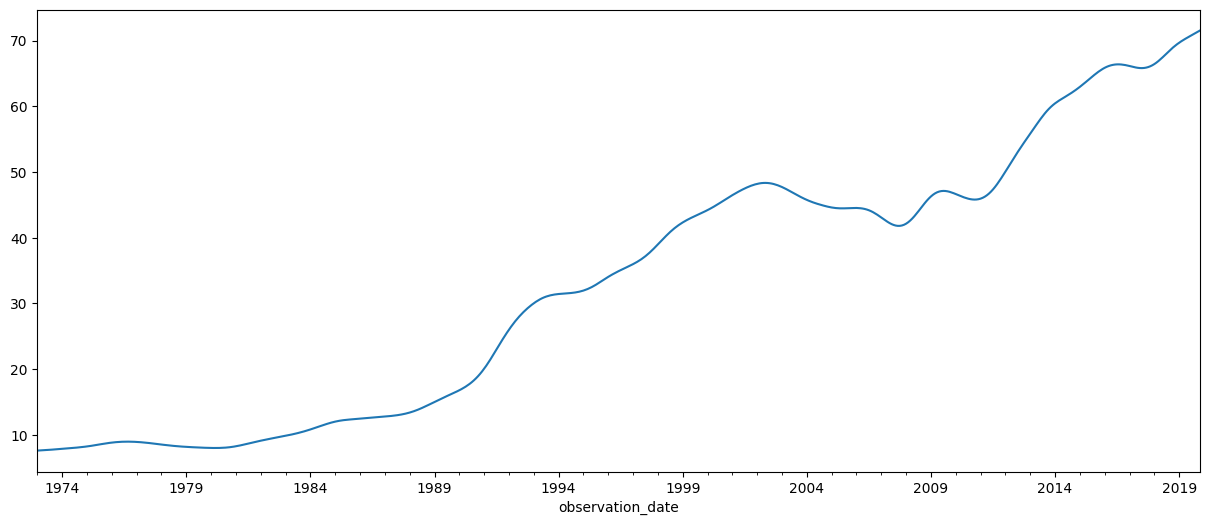

In [ ]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df= pd.read_excel(r'India_Exchange_Rate_Dataset.xls', index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend= hpfilter(df['EXINUS'], lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

inference - trend is increasing gradually

SHAMPOO CSV

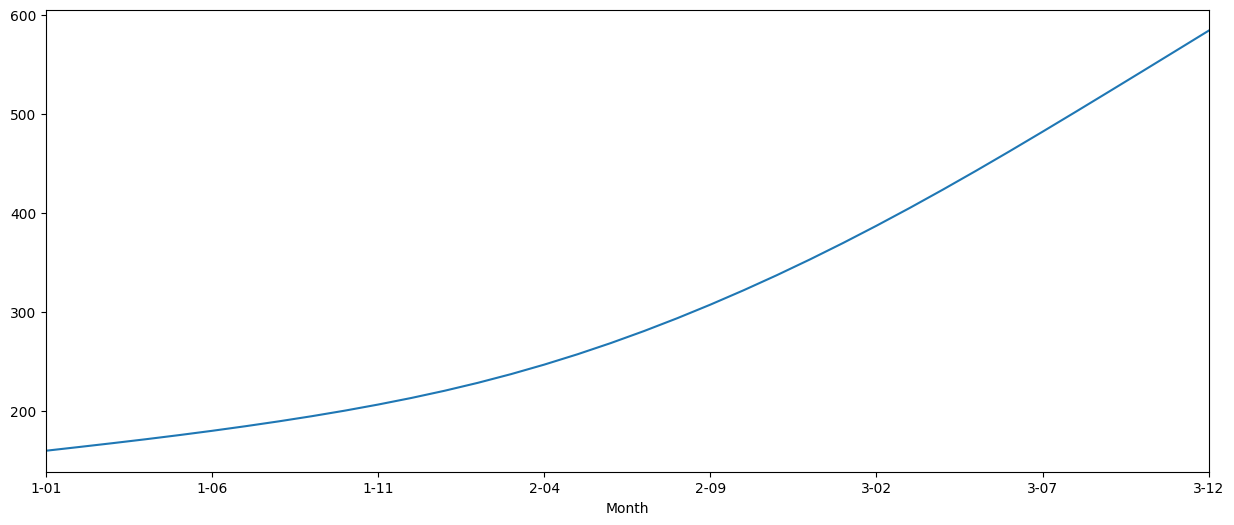

In [ ]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df= pd.read_csv(r'shampoo.csv', index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend= hpfilter(df['Sales'], lamb=1600)
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

inference - trend is increasing exponentially


# **Detrending**

Detrending is the process of removing a trend from time-series data, or it mentions a change in the mean over time.
The following are methods to detrend time-series data:

*   Pandas differencing
*   SciPy signal
*   HP Filter



## Detrending using Pandas Differencing

EXCHANGE RATE DATASET

<ipython-input-10-a4b78a44b26f>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Text(0.5, 0, 'Year')

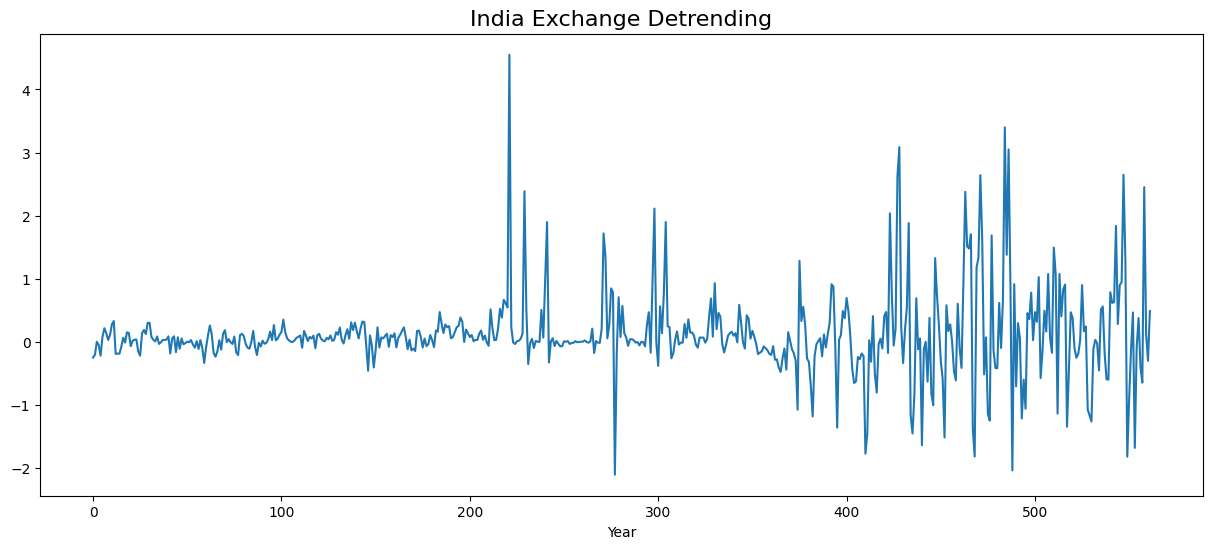

In [ ]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt

def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')

series= pd.read_excel(r'India_Exchange_Rate_Dataset.xls', index_col=0,parse_dates=True)
X= series.values
diff= list()
for i in range(1, len(X)):
  value= X[i] -X[i-1]
  diff.append(value)
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('India Exchange Detrending', fontsize=16)
plt.xlabel('Year')

SHAMPOO

<ipython-input-11-53aefcc4a42a>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-11-53aefcc4a42a>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series= pd.read_csv('shampoo.csv', header=0,index_col=0,parse_dates=[0],squeeze=True,date_parser=parser)


Text(0.5, 0, 'Year')

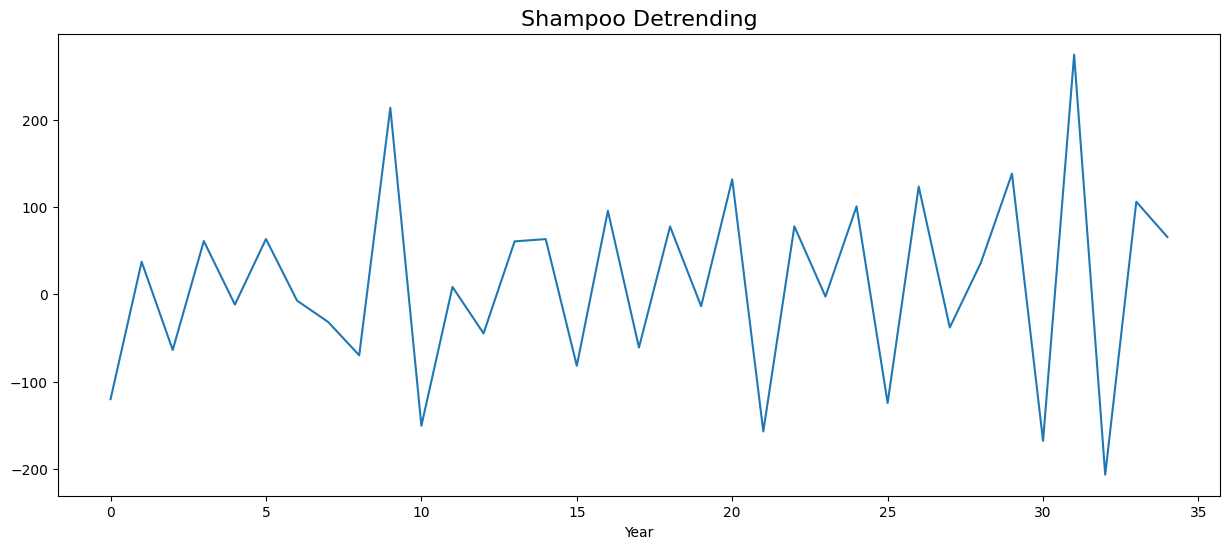

In [ ]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt

def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')

series= pd.read_csv('shampoo.csv', header=0,index_col=0,parse_dates=[0],squeeze=True,date_parser=parser)
X= series.values
diff= list()
for i in range(1, len(X)):
  value= X[i] - X[i-1]
  diff.append(value)
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Shampoo Detrending', fontsize=16)
plt.xlabel('Year')

# Detrending using diff() function of pandas

EXCHANGE RATE DATASET

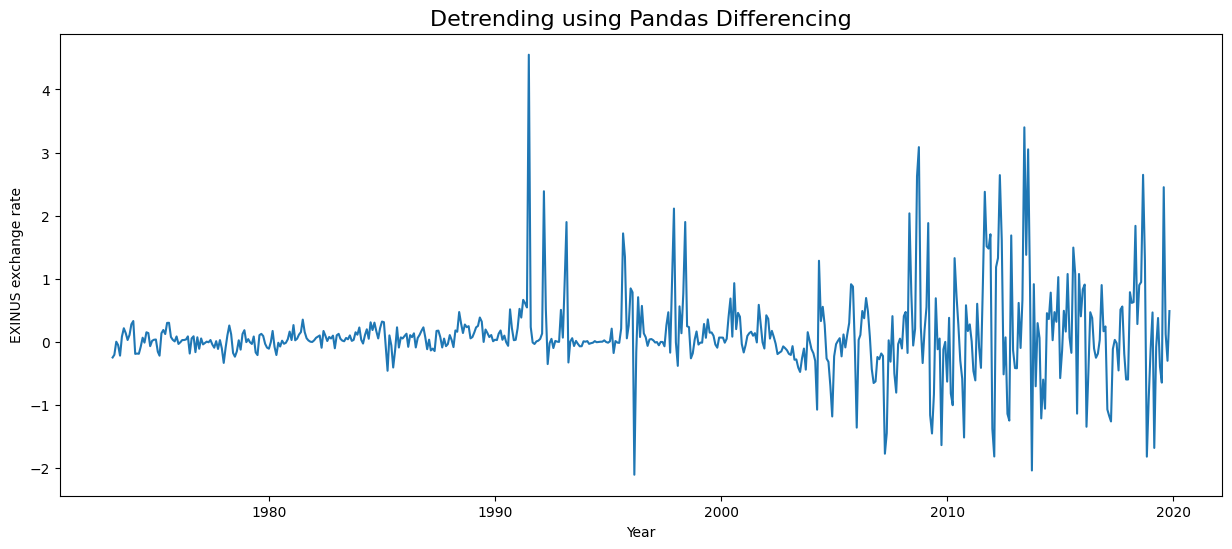

In [ ]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df= pd.read_excel(r'India_Exchange_Rate_Dataset.xls', index_col=0,parse_dates=True)
diff= df.EXINUS.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

SHAMPOO CSV

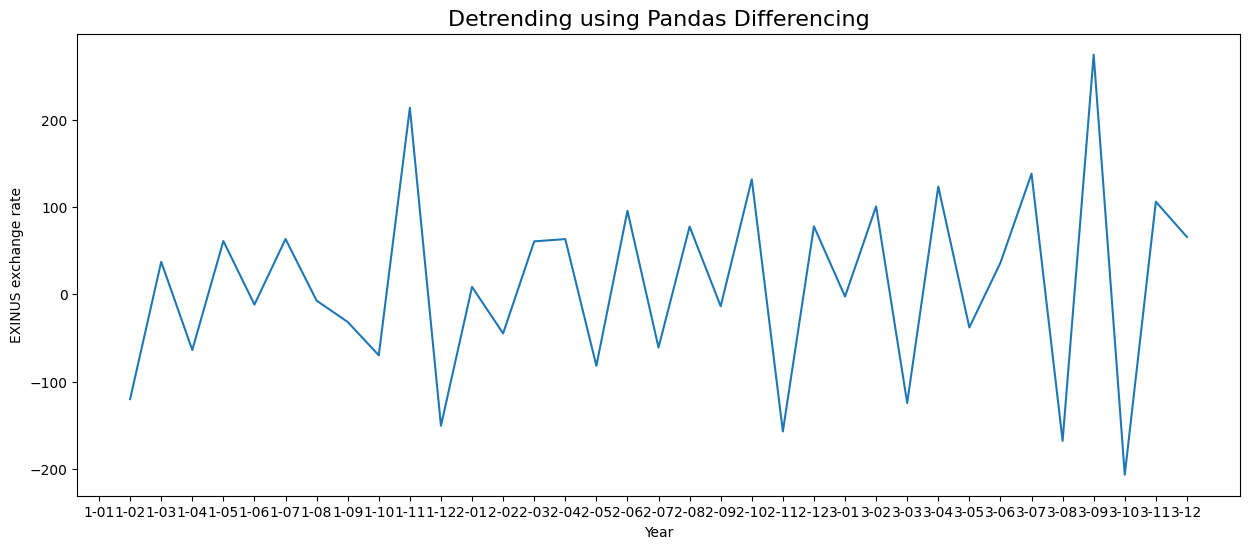

In [ ]:
df= pd.read_csv('shampoo.csv', index_col=0,parse_dates=True)
diff= df.Sales.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Detrending using SciPy signal

EXCHANGE RATE DATASET

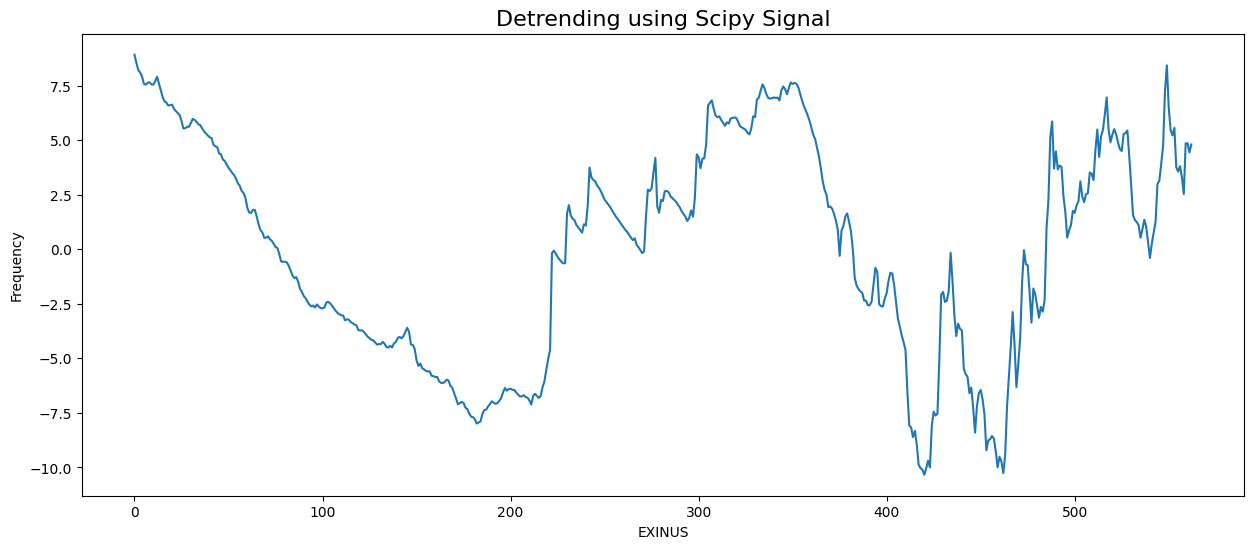

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df= pd.read_excel(r'India_Exchange_Rate_Dataset.xls', index_col=0,parse_dates=True)
detrended= signal.detrend(df.EXINUS.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

SHAMPOO CSV

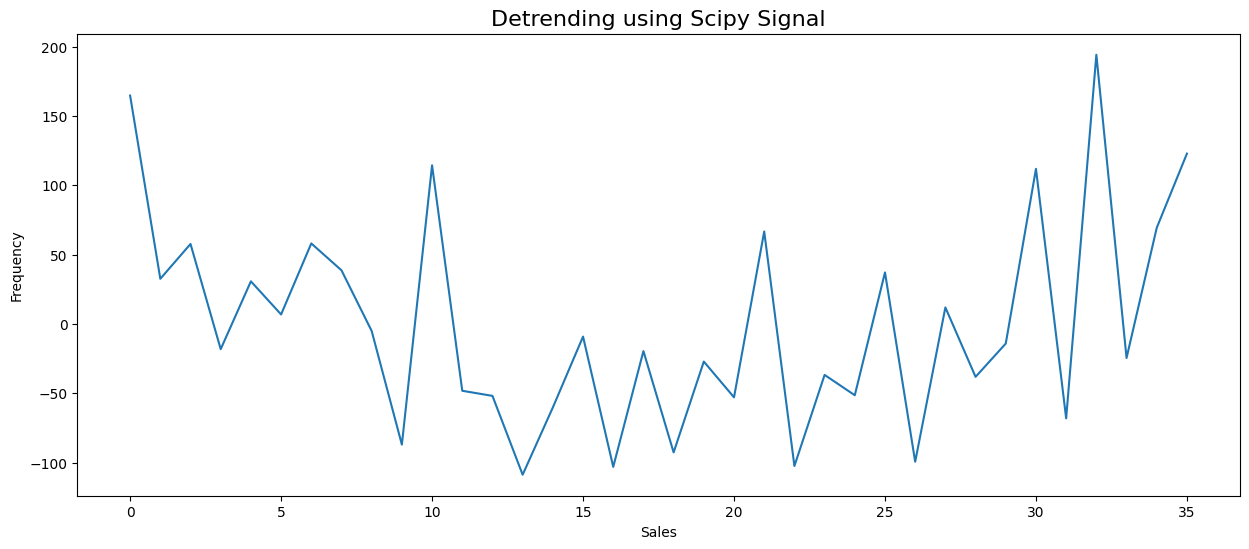

In [ ]:
df= pd.read_csv('shampoo.csv', index_col=0,parse_dates=True)
detrended= signal.detrend(df.Sales.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

# Detrending using HP filter

EXCHANGE RATE DATASET

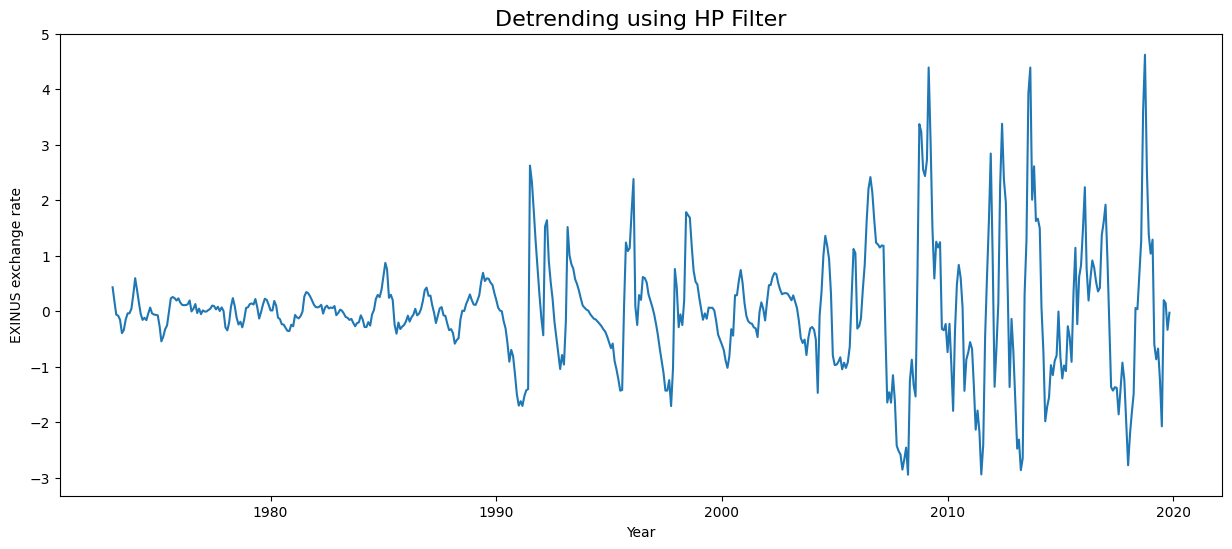

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
df=pd.read_excel(r'India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)
EXINUS_cycle,EXINUS_trend= hpfilter(df['EXINUS'], lamb=1600)
df['trend'] = EXINUS_trend
detrended= df.EXINUS -df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

SHAMPOO CSV

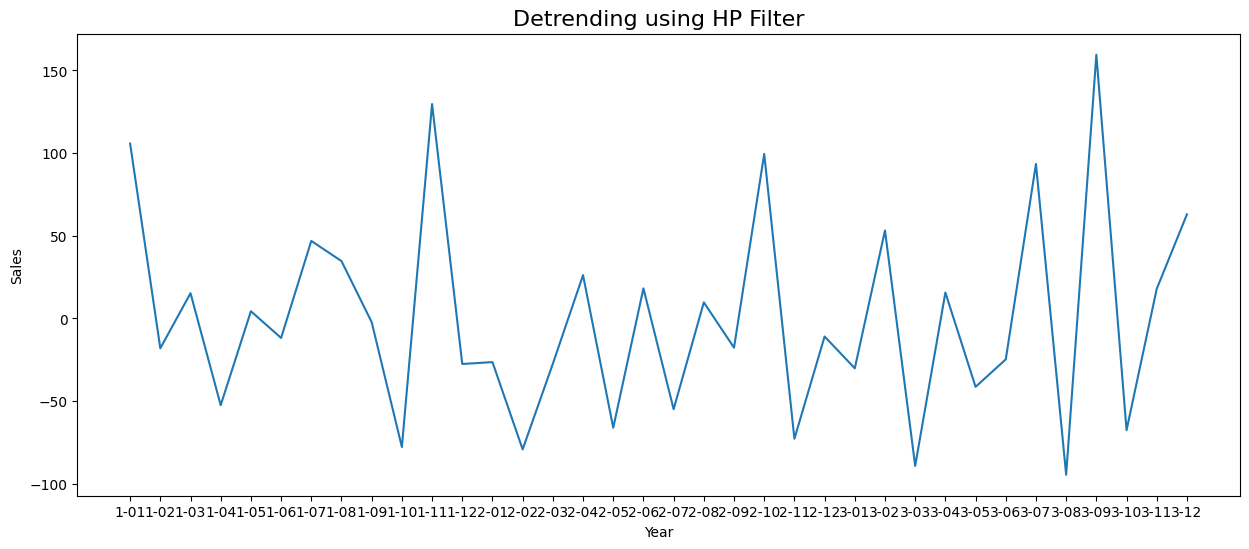

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
df=pd.read_csv('shampoo.csv',index_col=0,parse_dates=True)
Sales_cycle,Sales_trend= hpfilter(df['Sales'], lamb=1600)
df['trend'] = Sales_trend
detrended= df.Sales -df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()